In [2]:
from __future__ import division       
import math
import matplotlib as mpl              ### May need these two lines for mac osx users
mpl.use('TkAgg')                      ###
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
%matplotlib inline

Lets load in the dataset

In [3]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


See the shape of the dataset

In [5]:
df.shape

(891, 12)

Here we can see the that it has 891 rows of data and 12 attributes worth of imformation.

In [6]:
len(df)

891

In [7]:
len(df.columns)

12

In [8]:
# where df.columns is 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [16]:
my_famous_passenger = df[df["Name"] == "Guggenheim, Mr. Benjamin"]
print(my_famous_passenger)

     PassengerId  Survived  Pclass                      Name   Sex  Age  \
789          790         0       1  Guggenheim, Mr. Benjamin  male   46   

     SibSp  Parch    Ticket  Fare    Cabin Embarked  
789      0      0  PC 17593  79.2  B82 B84        C  


In [10]:
###Lets get some information about a column

### Like mean age on the boat
df["Age"].mean()

### Fare
df["Fare"].mean()
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
my_famous_passenger = df[df["Fare"] == 512.3292]
print(my_famous_passenger)

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex  Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female   35      0      0  PC 17755  512.3292          NaN        C  
679    male   36      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male   35      0      0  PC 17755  512.3292         B101        C  


In [11]:
####Lets rearrange some columns. This would be very hard to do using a csv library and doing this by hand.
####Panda allows us to do this very intuitively
cols = list(df.columns.values)
print(cols)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [12]:
#Using that list above, we can create a new list, with the values rearranged.
cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerId']
new_df = df[cols]
new_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,4
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,5


In [13]:
#### We can create new dataframes from a few attributes
new_df = df[["Sex","Age"]]
new_df.head()


,Sex,Age
0,male,22
1,female,38
2,female,26
3,female,35
4,male,35


In [38]:
df_of_women = df[df["Sex"] == "female"] #### Elaborate and find out what it means to df a df? Look up panda series
df_of_men = df[df["Sex"] == "male"]

In [10]:
df_of_women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [11]:
df_of_women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S


In [ ]:
# Excercise 
# Create three data frames. Capture them by passenger class 'PClass'. 
# There are three of them. Then figure out the size of each one.





In [14]:
df_pclass_1 = df[df["Pclass"] == 1]
df_pclass_1.head()
df_pclass_1.shape

(216, 12)

In [13]:
df_pclass_2 = df[df["Pclass"] == 2]
df_pclass_2.head()
df_pclass_2.shape

(184, 12)

In [14]:
df_pclass_3 = df[df["Pclass"] == 3]
df_pclass_3.head()
df_pclass_3.shape

(491, 12)

Observations: There were many people in third class. More so than the other two class of passengers combined.

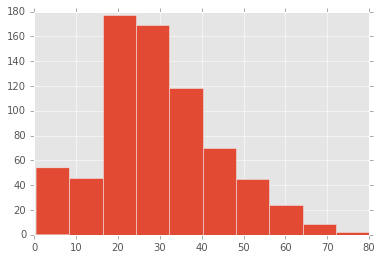

In [43]:
df["Age"].hist()

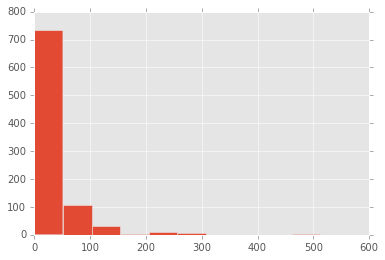

In [25]:
df["Fare"].hist()

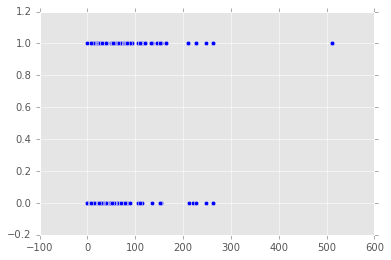

In [26]:
plt.scatter(df['Fare'], df['Survived'])
plt.show()

In [27]:
### Side step
# Lets create a scatter plot

d = {'one' : np.random.rand(10),
     'two' : np.random.rand(10)}
print(d)

{'one': array([ 0.58768372,  0.12589563,  0.20569639,  0.7193355 ,  0.10802686,
        0.07833048,  0.12088043,  0.04380611,  0.84743276,  0.73417542]), 'two': array([ 0.92741553,  0.4987176 ,  0.20595048,  0.05480946,  0.34159313,
        0.38408195,  0.65819937,  0.55409169,  0.43876357,  0.26967143])}


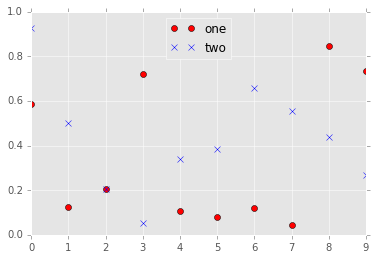

In [28]:
df_scrap = pd.DataFrame(d)
df_scrap.plot(style=['ro','bx'])

In [62]:
##### Back to the titanic. So we have our original dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [67]:
#### Lets group them by gender
grouped_by_sex = df.groupby(["Sex"])
grouped_by_sex.describe()

Age        Fare       Parch  PassengerId      Pclass  \
Sex                                                                         
female count  261.000000  314.000000  314.000000   314.000000  314.000000   
       mean    27.915709   44.479818    0.649682   431.028662    2.159236   
       std     14.110146   57.997698    1.022846   256.846324    0.857290   
       min      0.750000    6.750000    0.000000     2.000000    1.000000   
       25%     18.000000   12.071875    0.000000   231.750000    1.000000   
       50%     27.000000   23.000000    0.000000   414.500000    2.000000   
       75%     37.000000   55.000000    1.000000   641.250000    3.000000   
       max     63.000000  512.329200    6.000000   889.000000    3.000000   
male   count  453.000000  577.000000  577.000000   577.000000  577.000000   
       mean    30.726645   25.523893    0.235702   454.147314    2.389948   
       std     14.678201   43.138263    0.612294   257.486139    0.813580   
       min      0.420000    0.000000    0.000000     1.000000    1.000000   
       25%     21.000000    7.895800    0.000000   222.000000    2.000000   
       50%     29.000000   10.500000    0.000000   464.000000    3.000000   
       75%     39.000000   26.550000    0.000000   680.000000    3.000000   
       max     80.000000  512.329200    5.000000   891.000000    3.000000   

                   SibSp    Survived  
Sex                                   
female count  314.000000  314.000000  
       mean     0.694268    0.742038  
       std      1.156520    0.438211  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      8.000000    1.000000  
male   count  577.000000  577.000000  
       mean     0.429809    0.188908  
       std      1.061811    0.391775  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      0.000000    0.000000  
       max      8.000000    1.000000

In [68]:
#### Lets group them by gender
grouped_by_sex_and_pclass = df.groupby(["Sex", "Pclass"])
grouped_by_sex_and_pclass.describe()

Age        Fare       Parch  PassengerId  \
Sex    Pclass                                                          
female 1      count   85.000000   94.000000   94.000000    94.000000   
              mean    34.611765  106.125798    0.457447   469.212766   
              std     13.612052   74.259988    0.728305   247.476723   
              min      2.000000   25.929200    0.000000     2.000000   
              25%     23.000000   57.244800    0.000000   293.500000   
              50%     35.000000   82.664550    0.000000   447.000000   
              75%     44.000000  134.500000    1.000000   698.250000   
              max     63.000000  512.329200    2.000000   888.000000   
       2      count   74.000000   76.000000   76.000000    76.000000   
              mean    28.722973   21.970121    0.605263   443.105263   
              std     12.872702   10.891796    0.833930   243.627288   
              min      2.000000   10.500000    0.000000    10.000000   
              25%     22.250000   13.000000    0.000000   269.750000   
              50%     28.000000   22.000000    0.000000   439.500000   
              75%     36.000000   26.062500    1.000000   616.750000   
              max     57.000000   65.000000    3.000000   881.000000   
       3      count  102.000000  144.000000  144.000000   144.000000   
              mean    21.750000   16.118810    0.798611   399.729167   
              std     12.729964   11.690314    1.237976   267.232416   
              min      0.750000    6.750000    0.000000     3.000000   
              25%     14.125000    7.854200    0.000000   165.250000   
              50%     21.500000   12.475000    0.000000   376.000000   
              75%     29.750000   20.221875    1.000000   636.000000   
              max     63.000000   69.550000    6.000000   889.000000   
male   1      count  101.000000  122.000000  122.000000   122.000000   
              mean    41.281386   67.226127    0.278689   455.729508   
              std     15.139570   77.548021    0.658853   247.026449   
              min      0.920000    0.000000    0.000000     7.000000   
              25%     30.000000   27.728100    0.000000   255.500000   
              50%     40.000000   41.262500    0.000000   480.500000   
              75%     51.000000   78.459375    0.000000   660.750000   
              max     80.000000  512.329200    4.000000   890.000000   
       2      count   99.000000  108.000000  108.000000   108.000000   
              mean    30.740707   19.741782    0.222222   447.962963   
              std     14.793894   14.922235    0.517603   256.922546   
              min      0.670000    0.000000    0.000000    18.000000   
              25%     23.000000   12.331250    0.000000   225.750000   
              50%     30.000000   13.000000    0.000000   416.500000   
              75%     36.750000   26.000000    0.000000   677.500000   
              max     70.000000   73.500000    2.000000   887.000000   
       3      count  253.000000  347.000000  347.000000   347.000000   
              mean    26.507589   12.661633    0.224784   455.515850   
              std     12.159514   11.681696    0.623404   261.921251   
              min      0.420000    0.000000    0.000000     1.000000   
              25%     20.000000    7.750000    0.000000   209.500000   
              50%     25.000000    7.925000    0.000000   466.000000   
              75%     33.000000   10.008300    0.000000   687.500000   
              max     74.000000   69.550000    5.000000   891.000000   

                          SibSp    Survived  
Sex    Pclass                                
female 1      count   94.000000   94.000000  
              mean     0.553191    0.968085  
              std      0.665865    0.176716  
              min      0.000000    0.000000  
              25%      0.000000    1.000000  
              50%      0.000000    1.000000  
              75%      1.000000    1.000000  
             

In [69]:
#### Lets group them by gender
grouped_by_sex_and_pclass_survived = df.groupby(["Sex", "Pclass", "Survived"])
grouped_by_sex_and_pclass_survived.describe()

Age        Fare       Parch  PassengerId  \
Sex    Pclass Survived                                                          
female 1      0        count    3.000000    3.000000    3.000000     3.000000   
                       mean    25.666667  110.604167    1.333333   325.000000   
                       std     24.006943   70.920264    1.154701   162.194328   
                       min      2.000000   28.712500    0.000000   178.000000   
                       25%     13.500000   90.131250    1.000000   238.000000   
                       50%     25.000000  151.550000    2.000000   298.000000   
                       75%     37.500000  151.550000    2.000000   398.500000   
                       max     50.000000  151.550000    2.000000   499.000000   
              1        count   82.000000   91.000000   91.000000    91.000000   
                       mean    34.939024  105.978159    0.428571   473.967033   
                       std     13.223014   74.738897    0.701472   248.968916   
                       min     14.000000   25.929200    0.000000     2.000000   
                       25%     23.250000   57.489600    0.000000   296.000000   
                       50%     35.000000   82.170800    0.000000   458.000000   
                       75%     44.000000  134.075000    1.000000   705.000000   
                       max     63.000000  512.329200    2.000000   888.000000   
       2      0        count    6.000000    6.000000    6.000000     6.000000   
                       mean    36.000000   18.250000    0.166667   423.500000   
                       std     12.915107    6.969577    0.408248   322.594947   
                       min     24.000000   10.500000    0.000000    42.000000   
                       25%     26.250000   13.000000    0.000000   228.250000   
                       50%     32.500000   17.000000    0.000000   335.500000   
                       75%     42.500000   24.750000    0.000000   669.250000   
                       max     57.000000   26.000000    1.000000   855.000000   
              1        count   68.000000   70.000000   70.000000    70.000000   
                       mean    28.080882   22.288989    0.642857   444.785714   
                       std     12.764693   11.140937    0.851864   238.617023   
                       min      2.000000   10.500000    0.000000    10.000000   
                       25%     21.750000   13.000000    0.000000   280.750000   
                       50%     28.000000   23.000000    0.000000   442.500000   
...                                  ...         ...         ...          ...   
male   2      0        std     12.158125   15.720548    0.436436   255.021371   
                       min     16.000000    0.000000    0.000000    21.000000   
                       25%     24.750000   11.500000    0.000000   231.000000   
                       50%     30.500000   13.000000    0.000000   419.000000   
                       75%     39.000000   26.000000    0.000000   685.500000   
                       max     70.000000   73.500000    2.000000   887.000000   
              1        count   15.000000   17.000000   17.000000    17.000000   
                       mean    16.022000   21.095100    0.647059   415.588235   
                       std     19.547122    9.832542    0.701888   272.558035   
                       min      0.670000   10.500000    0.000000    18.000000   
                       25%      1.000000   13.000000    0.000000   194.000000   
                       50%      3.000000   18.750000    1.000000   408.000000   
                       75%     31.500000   26.000000    1.000000   571.000000   
                       max     62.000000   39.000000    2.000000   832.000000   
       3      0        count  215.000000  300.000000  300.000000   300.000000   
                       mean    27.255814   12.204469    0.213333   456.750000   
                       std     12.135707   10.984904    0.629133   2

In [70]:
df.groupby(['Sex', 'Pclass',"Survived"]).count() ### Count of records in each group throughout a dataset

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Pclass Survived                                                       
female 1      0                   3     3    3      3      3       3     3   
              1                  91    91   82     91     91      91    91   
       2      0                   6     6    6      6      6       6     6   
              1                  70    70   68     70     70      70    70   
       3      0                  72    72   55     72     72      72    72   
              1                  72    72   47     72     72      72    72   
male   1      0                  77    77   61     77     77      77    77   
              1                  45    45   40     45     45      45    45   
       2      0                  91    91   84     91     91      91    91   
              1                  17    17   15     17     17      17    17   
       3      0                 300   300  215    300    300     300   300   
              1                  47    47   38     47     47      47    47   

                        Cabin  Embarked  
Sex    Pclass Survived                   
female 1      0             3         3  
              1            78        89  
       2      0             1         6  
              1             9        70  
       3      0             2        72  
              1             4        72  
male   1      0            56        77  
              1            39        45  
       2      0             2        91  
              1             4        17  
       3      0             4       300  
              1             2        47